In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Set visual style
sns.set_theme(style="whitegrid")

In [10]:
def prepare_messy_data(file_path):
    """Simulates a messy dataset for cleaning practice."""
    df = pd.read_csv(file_path)
    # Add duplicates and missingness
    df = pd.concat([df, df.iloc[:20]], ignore_index=True)
    df.loc[0:15, 'Monthly_Salary'] = np.nan
    df.loc[5:25, 'Department'] = np.nan
    df.loc[0:10, 'Job_Role'] = '  SENIOR executive  '
    df.loc[11:20, 'Job_Role'] = 'manager '
    return df

In [11]:
def clean_hr_data(df):
    """Performs 7+ cleaning actions."""
    df_clean = df.copy()
    
    # 1. Datatype Conversion
    df_clean['Employee_ID'] = df_clean['Employee_ID'].astype(str)
    
    # 2. Smart Imputation (Median for Salary)
    df_clean['Monthly_Salary'] = df_clean['Monthly_Salary'].fillna(df_clean['Monthly_Salary'].median())
    
    # 3. Categorical Imputation (Mode for Department)
    dept_mode = df_clean['Department'].mode()[0]
    df_clean['Department'] = df_clean['Department'].fillna(dept_mode)
    
    # 4. Text Standardization
    df_clean['Job_Role'] = df_clean['Job_Role'].str.strip().str.title()
    
    # 5. Drop Duplicates
    df_clean = df_clean.drop_duplicates()
    
    # 6. Column Renaming
    df_clean.columns = [col.replace('_', ' ') for col in df_clean.columns]
    
    # 7. Drop Irrelevant Data
    df_clean = df_clean.drop(columns=['Employee ID'])
    
    return df_clean

In [12]:
def engineer_features(df):
    """Creates new analytical dimensions."""
    # Salary Brackets
    df['Salary Tier'] = pd.qcut(df['Monthly Salary'], q=3, labels=['Entry', 'Mid', 'Senior'])
    
    # Tenure Category
    df['Tenure Category'] = pd.cut(df['Years At Company'], 
                                   bins=[0, 2, 5, 10, 100], 
                                   labels=['Newbie', 'Junior', 'Mid-Level', 'Veteran'])
    
    # High Value Employee Flag
    df['Is High Value'] = (df['Performance Rating'] >= 4) & (df['Attrition'] == 'No')
    return df

In [13]:
# --- Execution ---
# 1. Load & Clean
raw_df = prepare_messy_data('hr_analytics_dummy_dataset.csv')
cleaned_df = clean_hr_data(raw_df)
analyzed_df = engineer_features(cleaned_df)

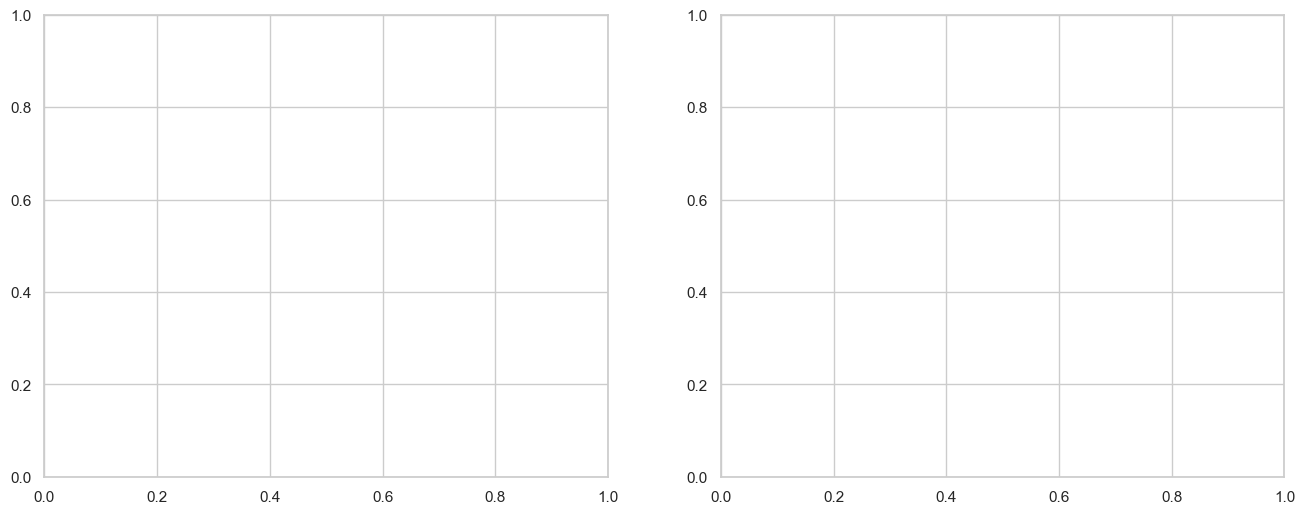

In [14]:
# 2. Visual Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

In [15]:
# Insight: Salary Distribution by Gender
sns.boxplot(data=analyzed_df, x='Gender', y='Monthly Salary', palette='Set2', ax=axes[0])
axes[0].set_title('Salary Distribution by Gender')

C:\Users\HP\AppData\Local\Temp\ipykernel_2716\2115747743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=analyzed_df, x='Gender', y='Monthly Salary', palette='Set2', ax=axes[0])


Text(0.5, 1.0, 'Salary Distribution by Gender')

In [16]:
# Insight: Performance vs Attrition
sns.countplot(data=analyzed_df, x='Performance Rating', hue='Attrition', palette='viridis', ax=axes[1])
axes[1].set_title('Attrition Count by Performance Rating')

Text(0.5, 1.0, 'Attrition Count by Performance Rating')

In [17]:
plt.tight_layout()
plt.savefig('hr_visual_insights.png')

<Figure size 640x480 with 0 Axes>

In [18]:
# 3. Statistical Summary
print("--- KEY INSIGHTS ---")
print(f"Top Department by Avg Salary:\n{analyzed_df.groupby('Department')['Monthly Salary'].mean().idxmax()}")
print(f"\nOverall Attrition Rate: {analyzed_df['Attrition'].value_counts(normalize=True)['Yes']:.2%}")

# 4. Export
analyzed_df.to_csv('refined_hr_analytics.csv', index=False)
print("\nSuccess: Refined dataset saved as 'refined_hr_analytics.csv'")

--- KEY INSIGHTS ---
Top Department by Avg Salary:
Finance

Overall Attrition Rate: 23.77%

Success: Refined dataset saved as 'refined_hr_analytics.csv'
